In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ai_job_dataset.csv")
data = df.copy()
data.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [41]:
df.describe

<bound method NDFrame.describe of         job_id                    job_title  salary_usd salary_currency  \
0      AI00001        AI Research Scientist       90376             USD   
1      AI00002         AI Software Engineer       61895             USD   
2      AI00003                AI Specialist      152626             USD   
3      AI00004                 NLP Engineer       80215             USD   
4      AI00005                AI Consultant       54624             EUR   
...        ...                          ...         ...             ...   
14995  AI14996            Robotics Engineer       38604             USD   
14996  AI14997  Machine Learning Researcher       57811             GBP   
14997  AI14998                 NLP Engineer      189490             USD   
14998  AI14999                   Head of AI       79461             EUR   
14999  AI15000     Computer Vision Engineer       56481             USD   

      experience_level employment_type company_location company_s

## 📊 Distributions of the Columns


In [4]:
data.drop("job_id", axis=1, inplace=True)

scale_vars = ['salary_usd', 'years_experience', 'job_description_length', 'benefits_score']
ordinal_vars = ['experience_level', 'company_size', 'remote_ratio', 'education_required']
nominal_vars = ['job_title', 'salary_currency', 'employment_type', 'company_location', 'employee_residence', 'industry', 'company_name']
date_vars = ['posting_date', 'application_deadline']
string_vars = ['required_skills']

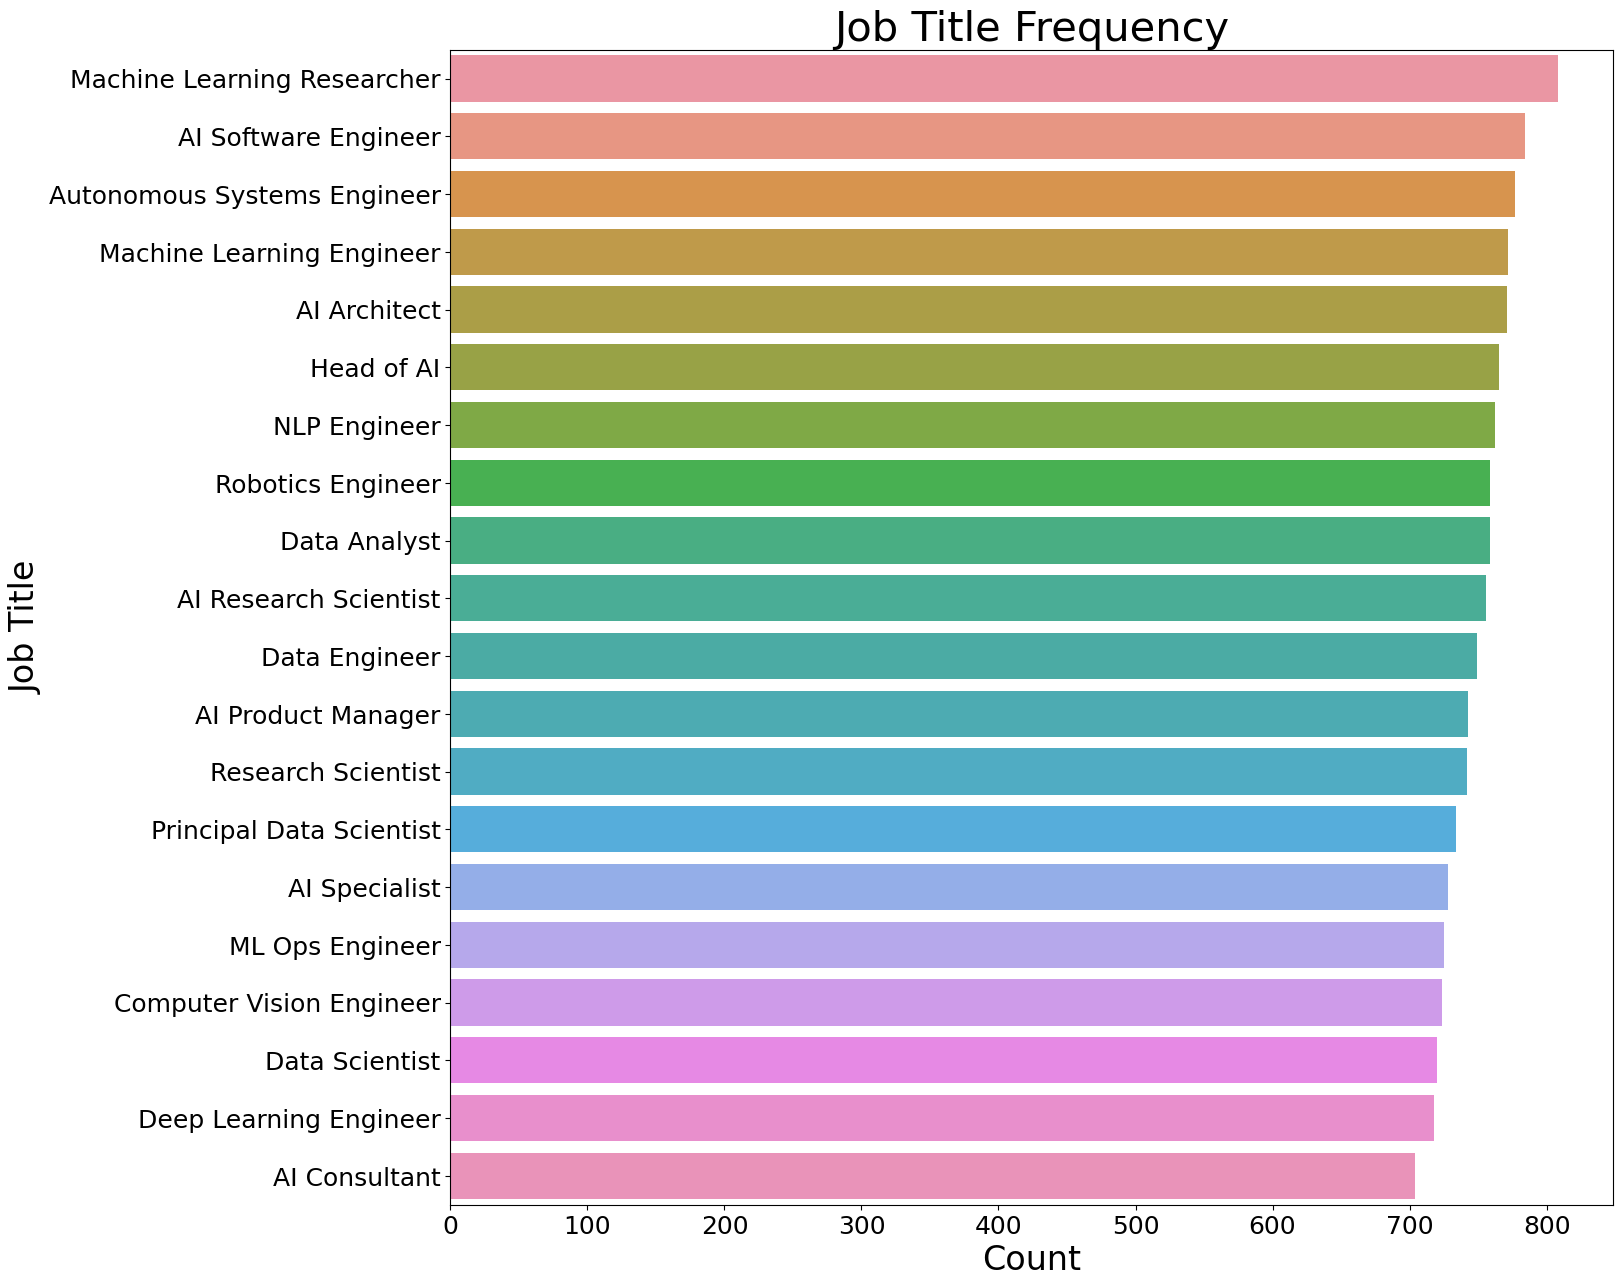

In [12]:
plt.figure(figsize=(15, 15))
sns.countplot(data=data, y="job_title", order=data.job_title.value_counts().index)

plt.title("Job Title Frequency", fontsize=30)
plt.xlabel("Count", fontsize=24)
plt.ylabel("Job Title", fontsize=24)            

plt.xticks(fontsize=18)                         
plt.yticks(fontsize=18)

plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


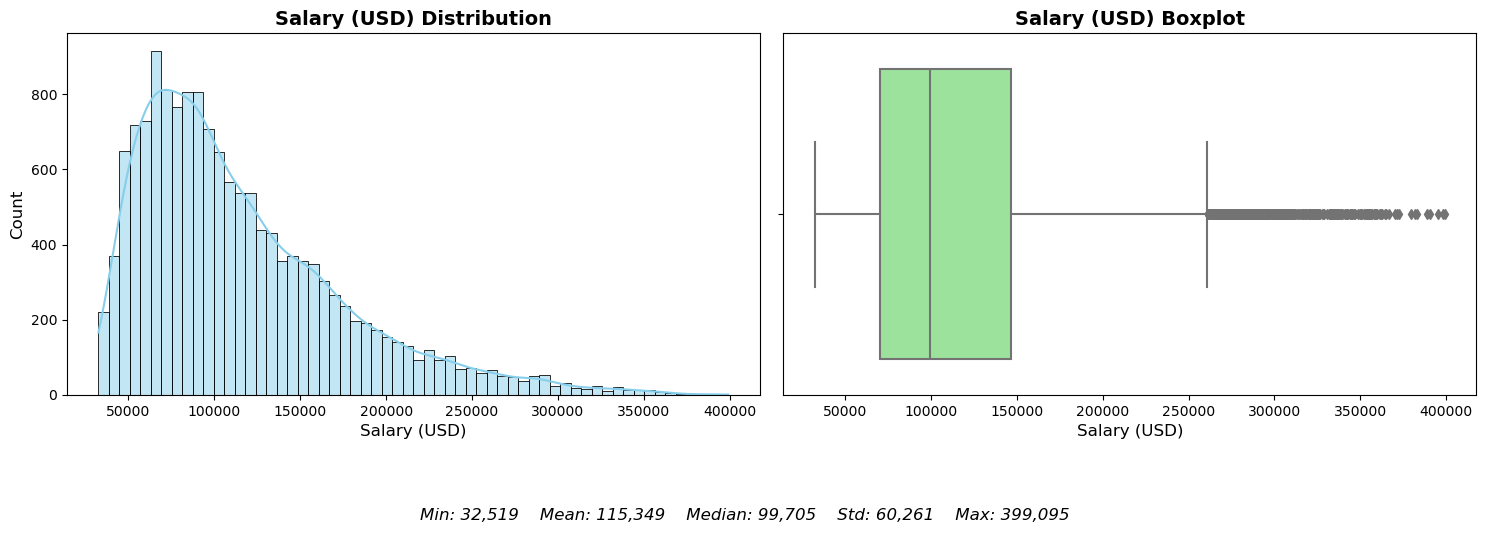

In [14]:

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=data, x="salary_usd", kde=True, color="skyblue", edgecolor="black")
plt.title("Salary (USD) Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Salary (USD)", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(x=data["salary_usd"], orient="h", color="lightgreen")
plt.title("Salary (USD) Boxplot", fontsize=14, fontweight='bold')
plt.xlabel("Salary (USD)", fontsize=12)

salary_stats = data['salary_usd'].describe()
salary_median = data['salary_usd'].median()
stats_str = (
    f"Min: {salary_stats['min']:,.0f}    "
    f"Mean: {salary_stats['mean']:,.0f}    "
    f"Median: {salary_median:,.0f}    "
    f"Std: {salary_stats['std']:,.0f}    "
    f"Max: {salary_stats['max']:,.0f}"
)

plt.figtext(0.5, -0.05, stats_str, ha="center", fontsize=12, fontstyle="italic")
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


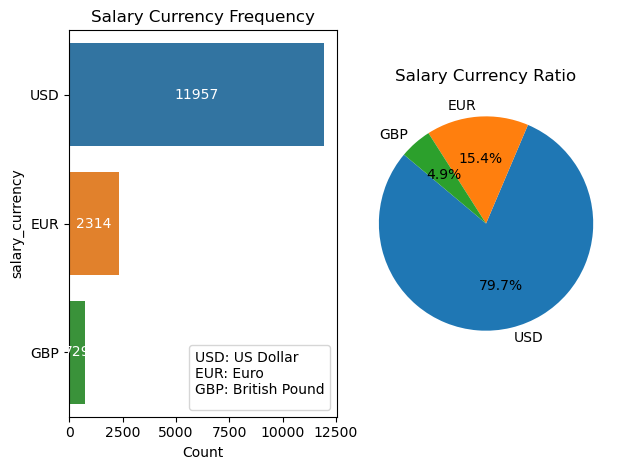

In [16]:
plt.subplot(1, 2, 1)
ax = sns.countplot(data=data, y="salary_currency", order=data.salary_currency.value_counts().index)
plt.title("Salary Currency Frequency")
plt.xlabel("Count")
plt.ylabel("salary_currency")
plt.legend(title="USD: US Dollar\nEUR: Euro\nGBP: British Pound", loc="lower right")
ax.bar_label(ax.containers[0], label_type='center', color='white', fontsize=10)

# 2. subplot: pie chart
plt.subplot(1, 2, 2)
salary_counts = data['salary_currency'].value_counts()
plt.pie(salary_counts, labels=salary_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Salary Currency Ratio")

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


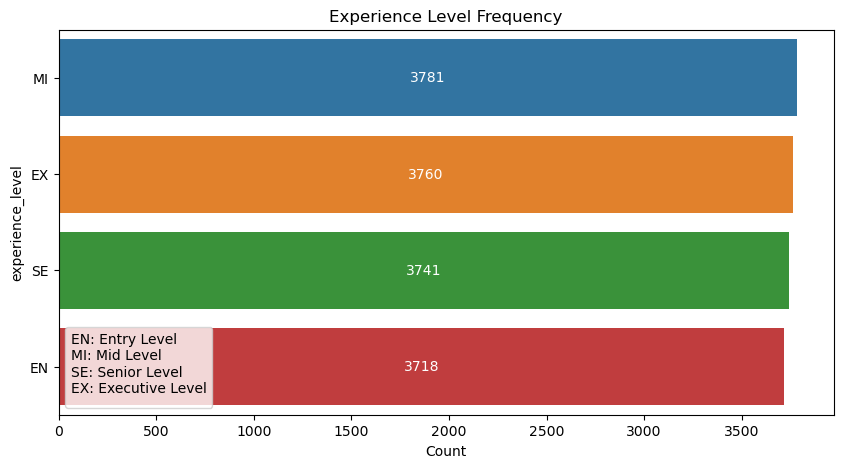

In [17]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data, y="experience_level", order=data.experience_level.value_counts().index)
plt.title("Experience Level Frequency")
plt.xlabel("Count")
plt.ylabel("experience_level")
plt.legend(title="EN: Entry Level\nMI: Mid Level\nSE: Senior Level\nEX: Executive Level", loc="lower left")
ax.bar_label(ax.containers[0], label_type='center', color='white', fontsize=10)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


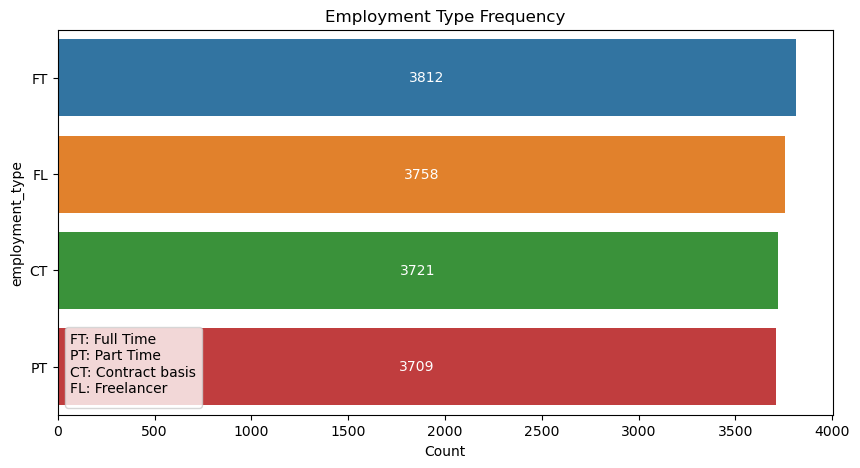

In [18]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data, y="employment_type", order=data.employment_type.value_counts().index)
plt.title("Employment Type Frequency")
plt.xlabel("Count")
plt.ylabel("employment_type")
plt.legend(title="FT: Full Time\nPT: Part Time\nCT: Contract basis\nFL: Freelancer", loc="lower left")
ax.bar_label(ax.containers[0], label_type='center', color='white', fontsize=10)
plt.show()

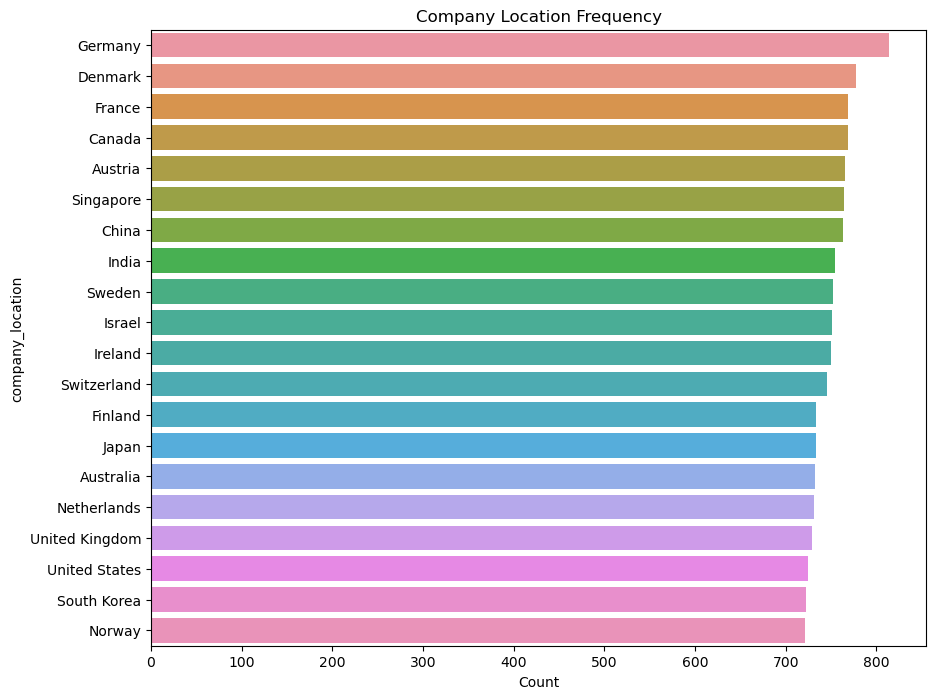

In [19]:
plt.figure(figsize=(10, 8))
sns.countplot(data, y="company_location", order=data.company_location.value_counts().index)
plt.title("Company Location Frequency")
plt.xlabel("Count")
plt.ylabel("company_location")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


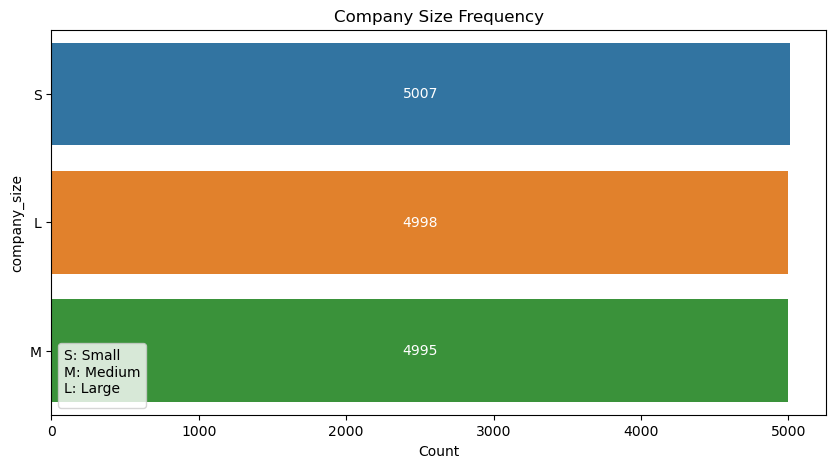

In [20]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data, y="company_size", order=data.company_size.value_counts().index)
plt.title("Company Size Frequency")
plt.xlabel("Count")
plt.ylabel("company_size")
plt.legend(title="S: Small\nM: Medium\nL: Large", loc="lower left")
ax.bar_label(ax.containers[0], label_type='center', color='white', fontsize=10)
plt.show()

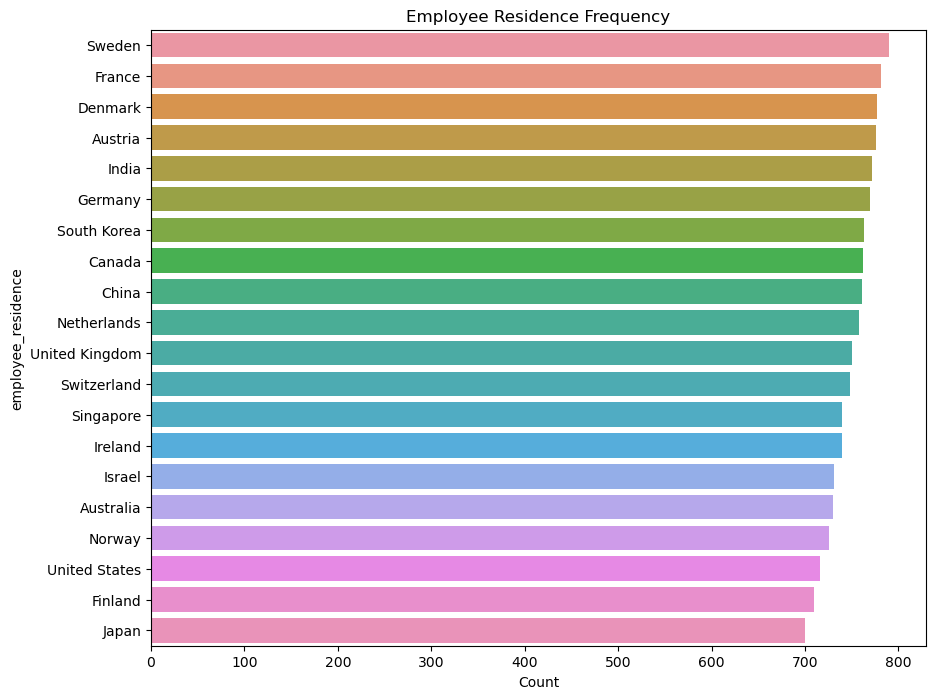

In [21]:
plt.figure(figsize=(10, 8))
sns.countplot(data, y="employee_residence", order=data.employee_residence.value_counts().index)
plt.title("Employee Residence Frequency")
plt.xlabel("Count")
plt.ylabel("employee_residence")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


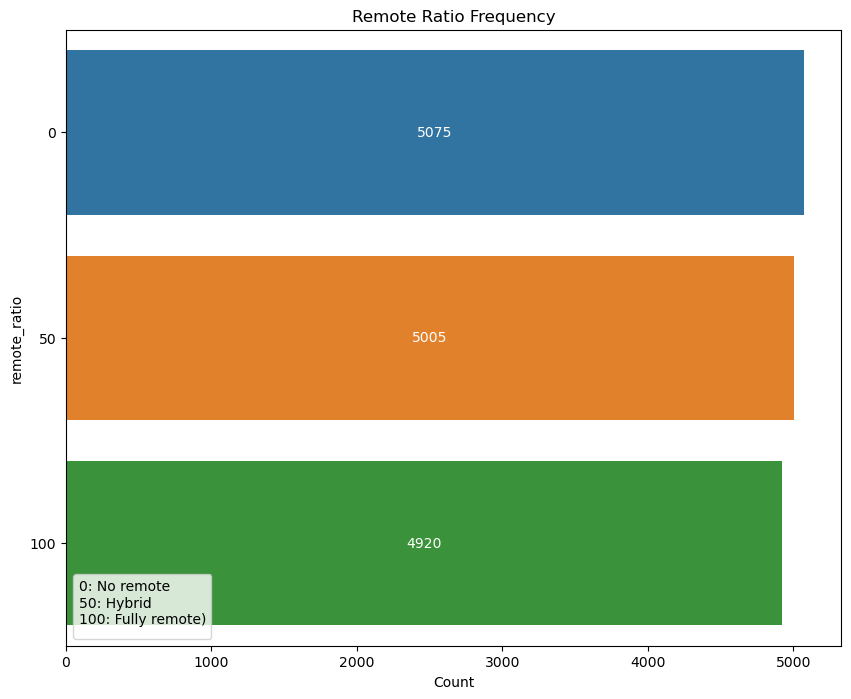

In [22]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data, y="remote_ratio", order=data.remote_ratio.value_counts().index)
plt.title("Remote Ratio Frequency")
plt.xlabel("Count")
plt.ylabel("remote_ratio")
ax.bar_label(ax.containers[0], label_type='center', color='white', fontsize=10)
plt.legend(title="0: No remote\n50: Hybrid\n100: Fully remote)", loc="lower left")
plt.show()

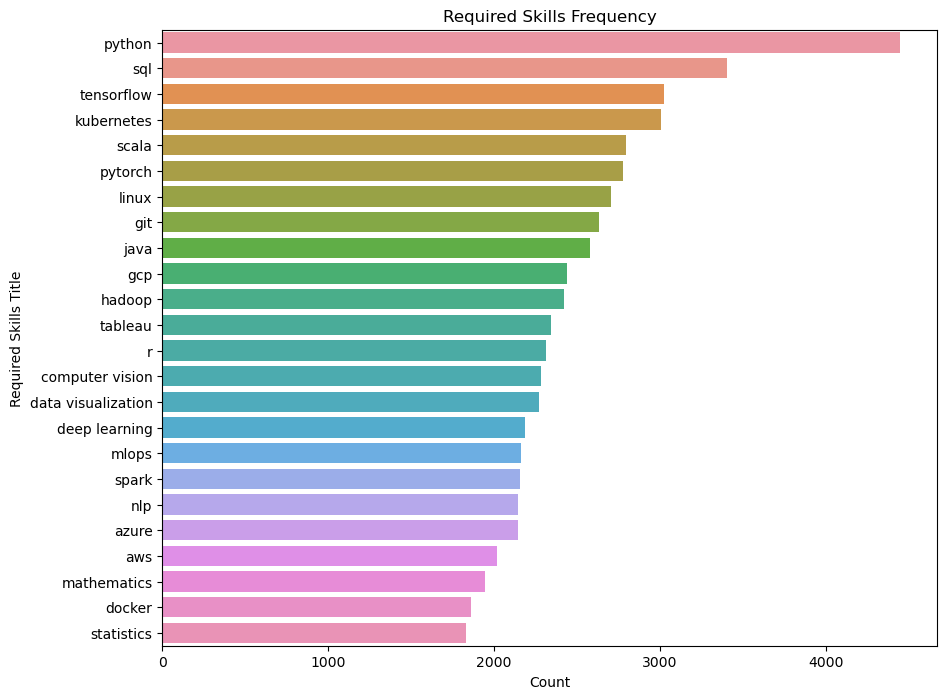

In [23]:
all_skills = data['required_skills'].dropna().str.lower().str.split(',').explode().str.strip()
all_skills = pd.DataFrame(all_skills)

plt.figure(figsize=(10, 8))
sns.countplot(all_skills, y="required_skills", order=all_skills.required_skills.value_counts().index)
plt.title("Required Skills Frequency")
plt.xlabel("Count")
plt.ylabel("Required Skills Title")
plt.show()

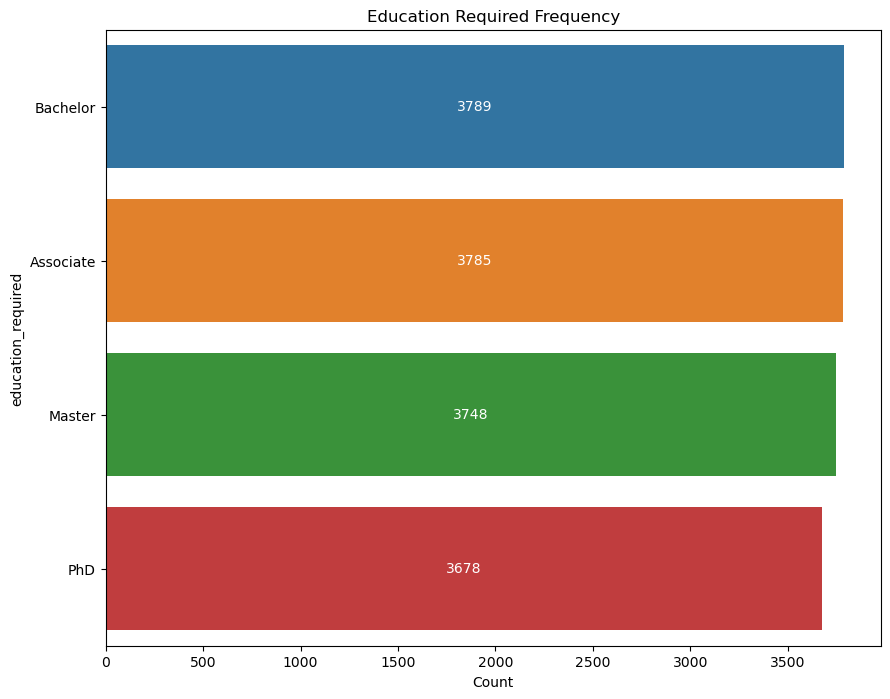

In [24]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data, y="education_required", order=data.education_required.value_counts().index)
plt.title("Education Required Frequency")
plt.xlabel("Count")
plt.ylabel("education_required")
ax.bar_label(ax.containers[0], label_type='center', color='white', fontsize=10)
plt.show()

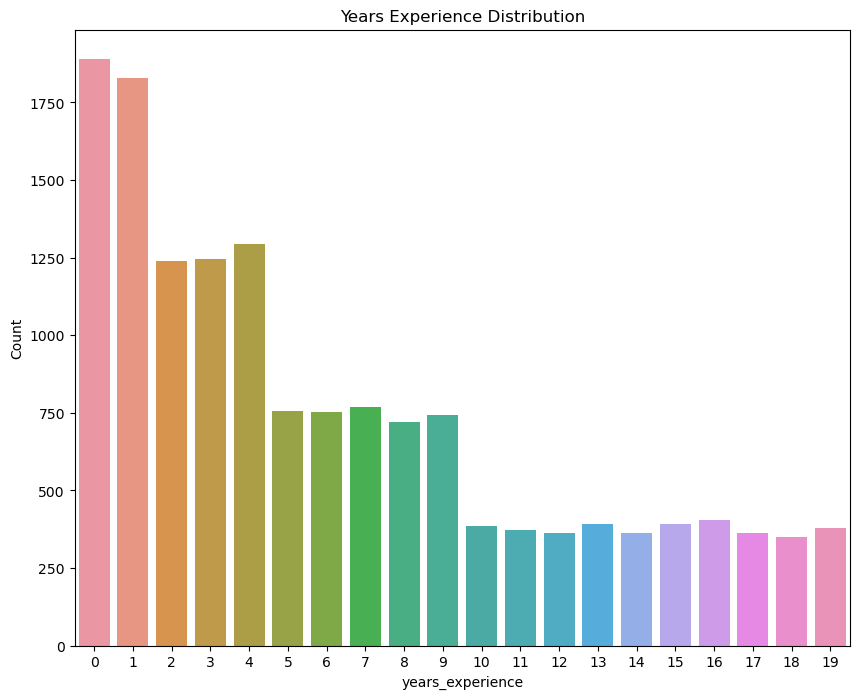

In [25]:
plt.figure(figsize=(10, 8))
sns.countplot(data, x="years_experience")
plt.title("Years Experience Distribution")
plt.xlabel("years_experience")
plt.ylabel("Count")
plt.show()

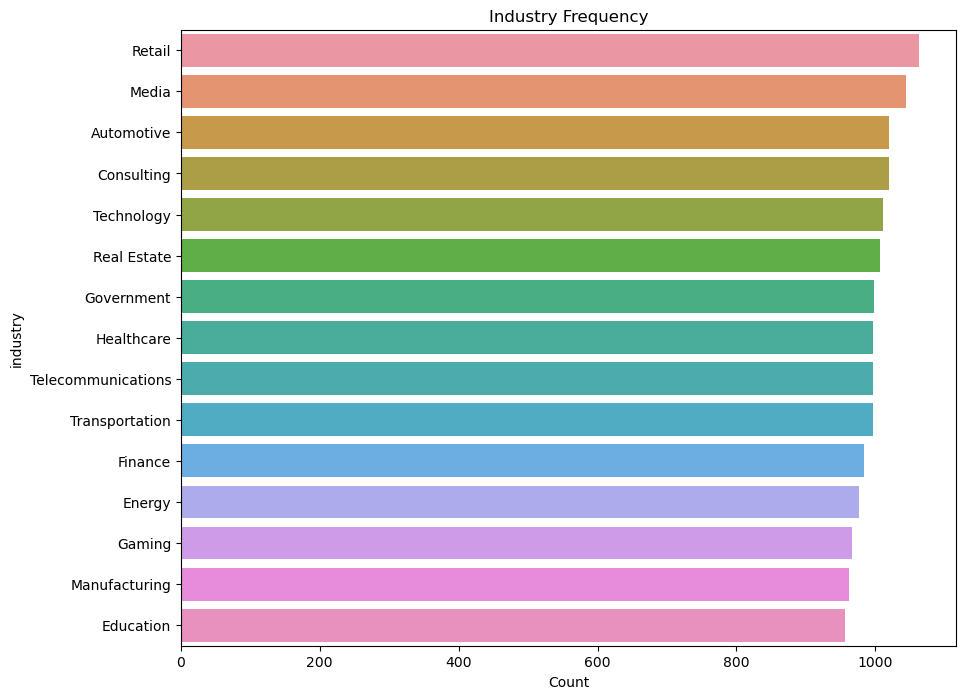

In [26]:
plt.figure(figsize=(10, 8))
sns.countplot(data, y="industry", order=data.industry.value_counts().index)
plt.title("Industry Frequency")
plt.xlabel("Count")
plt.ylabel("industry")
plt.show()

In [27]:
data['posting_date'] = pd.to_datetime(data['posting_date'])
data['posting_date_month'] = data['posting_date'].dt.to_period('M')
posting_date_month_counts = data['posting_date_month'].value_counts().sort_index()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



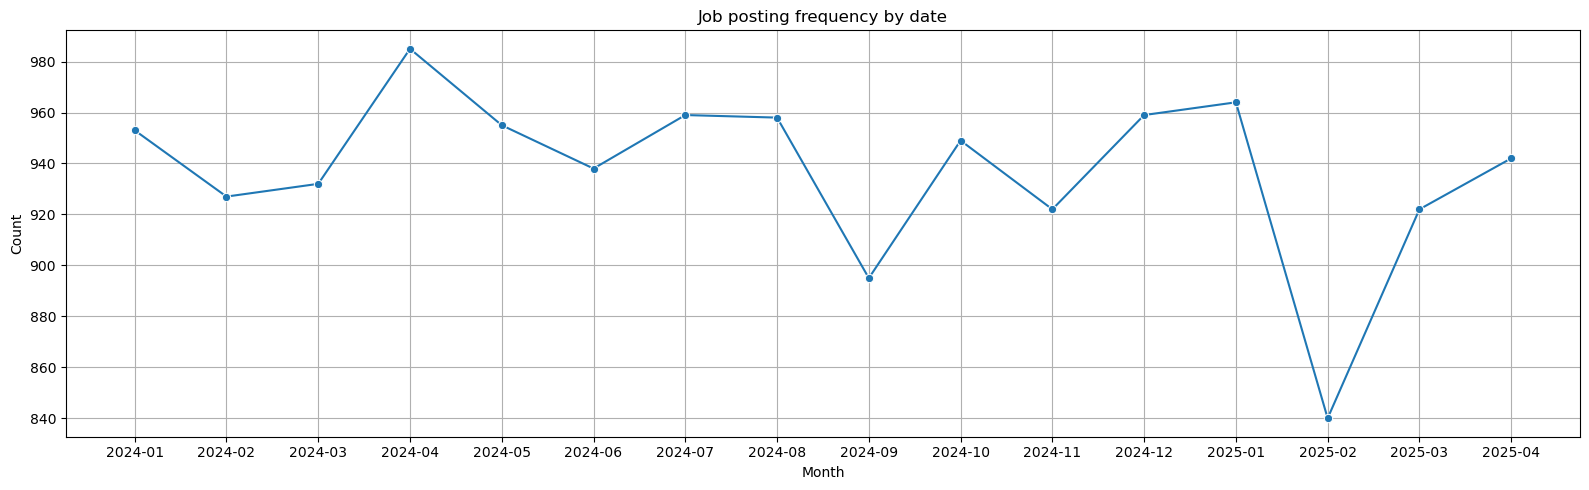

In [28]:
plt.figure(figsize=(16, 5))
sns.lineplot(x=posting_date_month_counts.index.astype(str), y=posting_date_month_counts.values, marker="o")
plt.title("Job posting frequency by date")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
data['application_deadline'] = pd.to_datetime(data['application_deadline'])
data['application_deadline_month'] = data['application_deadline'].dt.to_period('M')
application_deadline_month_counts = data['application_deadline_month'].value_counts().sort_index()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



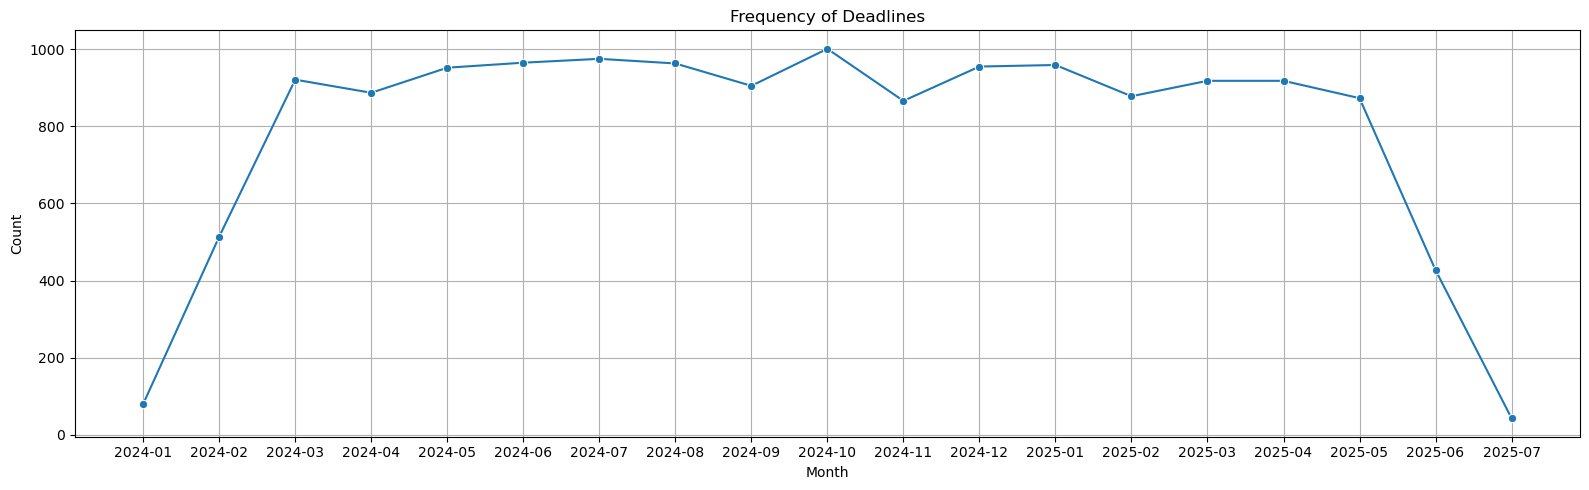

In [30]:
plt.figure(figsize=(16, 5))
sns.lineplot(x=application_deadline_month_counts.index.astype(str), y=application_deadline_month_counts.values, marker="o")
plt.title("Frequency of Deadlines")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Dell\AppData\Local\Temp\ipykernel_23308\3383488043.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



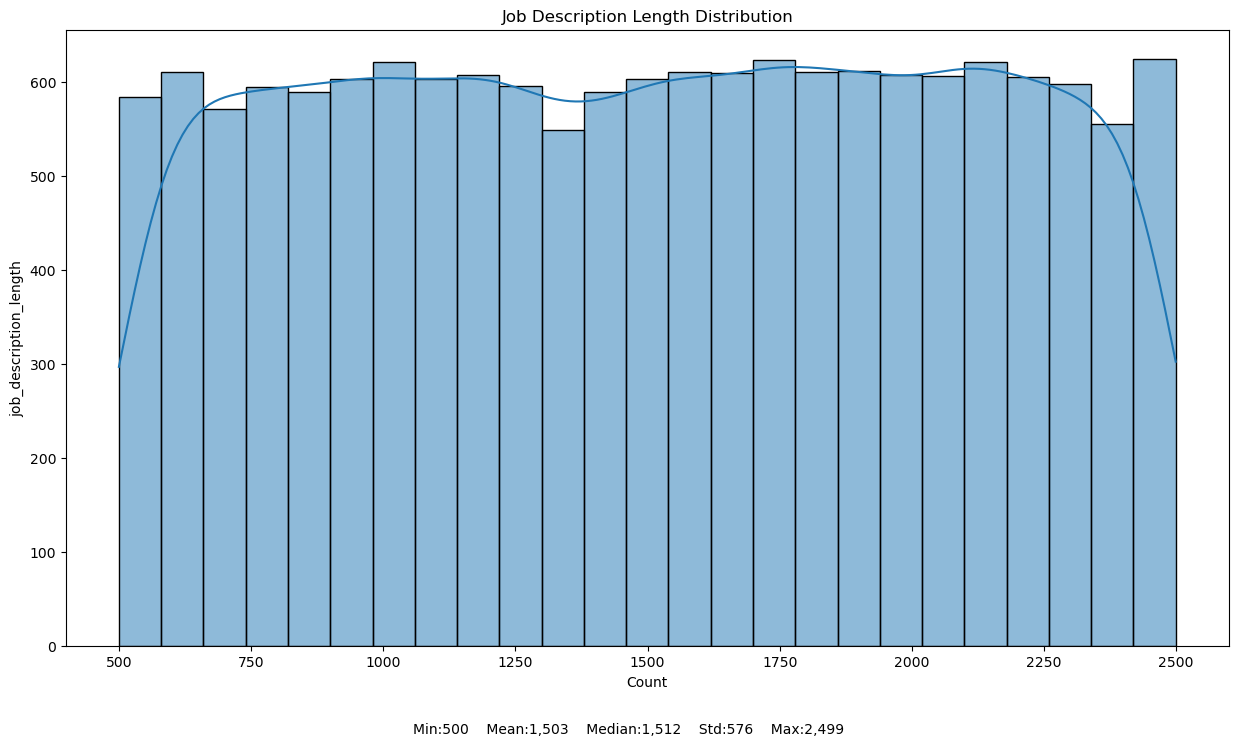

In [31]:
plt.figure(figsize=(15, 8))
sns.histplot(data=data, x="job_description_length", kde=True)
plt.title("Job Description Length Distribution")
plt.xlabel("Count")
plt.ylabel("job_description_length")

description_ist = data['job_description_length'].describe() 
description_median = data['job_description_length'].median()
description_ist_str = f"Min:{description_ist[3]:,.0f}    Mean:{description_ist[1]:,.0f}    Median:{description_median:,.0f}    Std:{description_ist[2]:,.0f}    Max:{description_ist[7]:,.0f}"
plt.figtext(0.5, -0.00005,description_ist_str , ha="center")

plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Dell\AppData\Local\Temp\ipykernel_23308\910297728.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



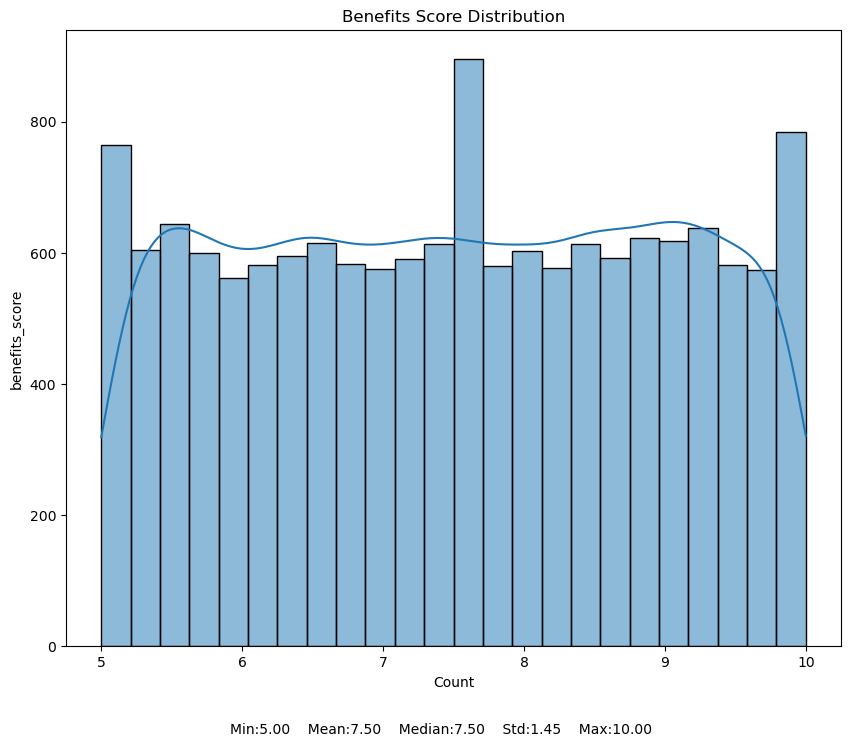

In [32]:
plt.figure(figsize=(10, 8))
sns.histplot(data=data, x="benefits_score", kde=True)
plt.title("Benefits Score Distribution")
plt.xlabel("Count")
plt.ylabel("benefits_score")

benefits_ist = data['benefits_score'].describe() 
benefits_median = data['benefits_score'].median()
benefits_ist_str = f"Min:{benefits_ist[3]:.2f}    Mean:{benefits_ist[1]:.2f}    Median:{benefits_median:.2f}    Std:{benefits_ist[2]:.2f}    Max:{benefits_ist[7]:.2f}"
plt.figtext(0.5, -0.00005,benefits_ist_str , ha="center")

plt.show()

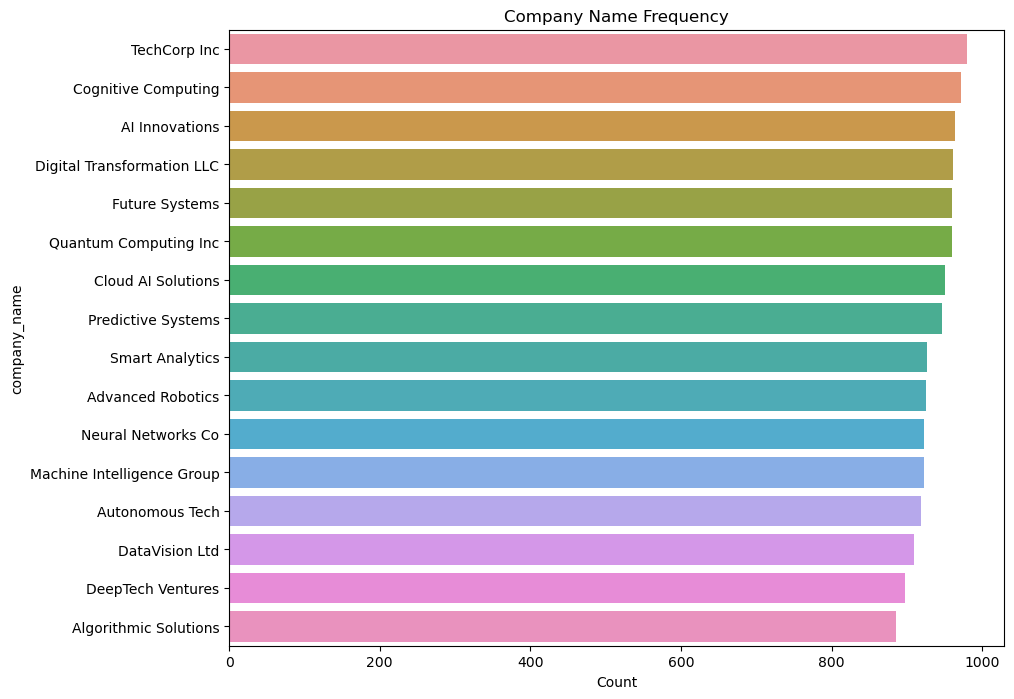

In [33]:
plt.figure(figsize=(10, 8))
sns.countplot(data, y="company_name", order=data.company_name.value_counts().index)
plt.title("Company Name Frequency")
plt.xlabel("Count")
plt.ylabel("company_name")
plt.show()

## 📊 Relationships

### 🔗 Categorical Relationships
- `company_location` vs `employee_residence`
- `company_location` vs `salary_currency`
- `employee_residence` vs `salary_currency`

### 📈 Numerical Relationships
- `experience_level` vs `salary_usd`
- `experience_level` vs `years_experience`
- `salary_usd` vs `years_experience`


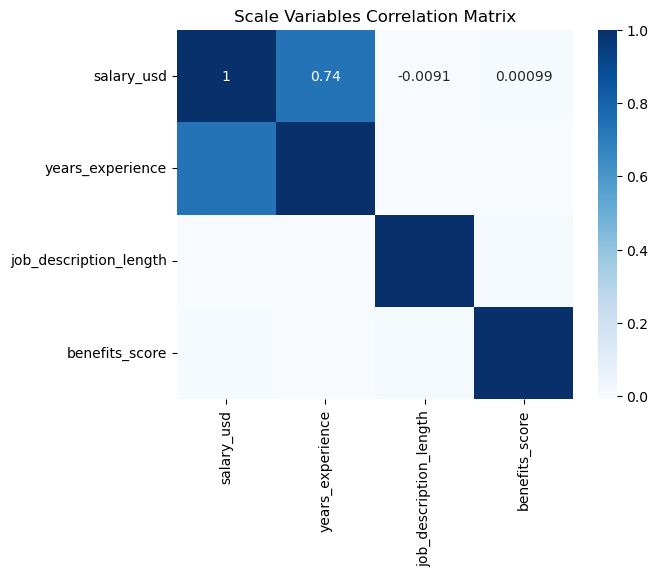

In [34]:
sns.heatmap(df[scale_vars].corr(), annot=True, cmap='Blues')
plt.title("Scale Variables Correlation Matrix")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



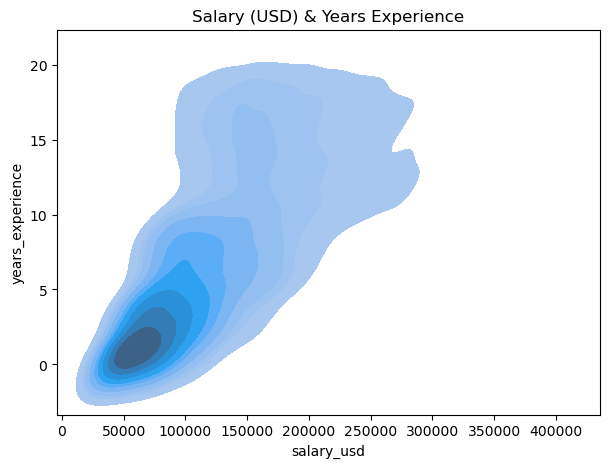

In [35]:
plt.figure(figsize=(7, 5))

sns.kdeplot(data=df, x='salary_usd', y='years_experience', fill=True)
plt.title('Salary (USD) & Years Experience')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


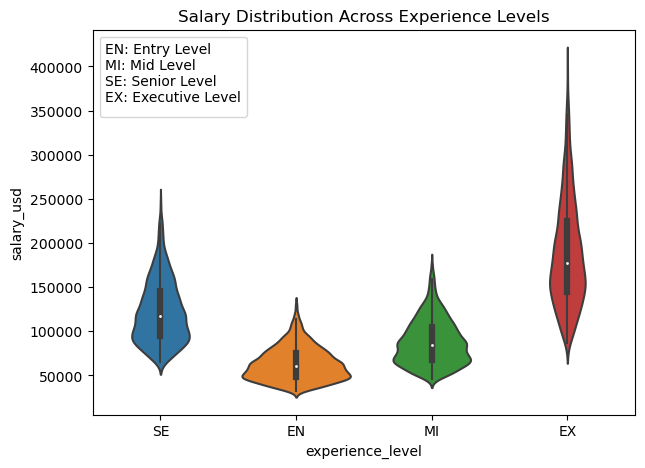

In [36]:
plt.figure(figsize=(7, 5))

sns.violinplot(x='experience_level', y='salary_usd', data=data)
plt.title("Salary Distribution Across Experience Levels")
plt.legend(title="EN: Entry Level\nMI: Mid Level\nSE: Senior Level\nEX: Executive Level", loc="upper left")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


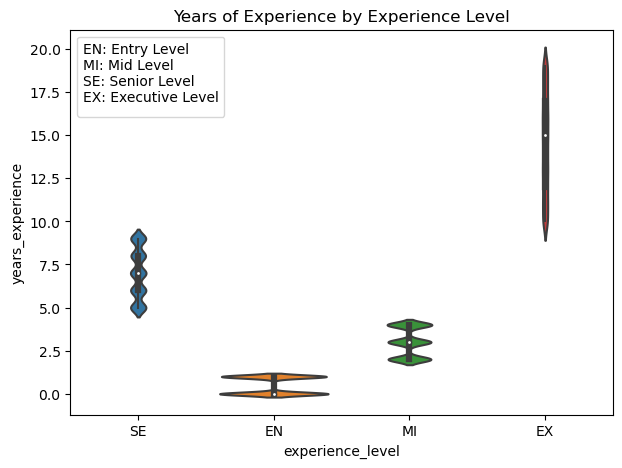

In [37]:
plt.figure(figsize=(7, 5))

sns.violinplot(x='experience_level', y='years_experience', data=data)
plt.title("Years of Experience by Experience Level")
plt.legend(title="EN: Entry Level\nMI: Mid Level\nSE: Senior Level\nEX: Executive Level", loc="upper left")

plt.show()

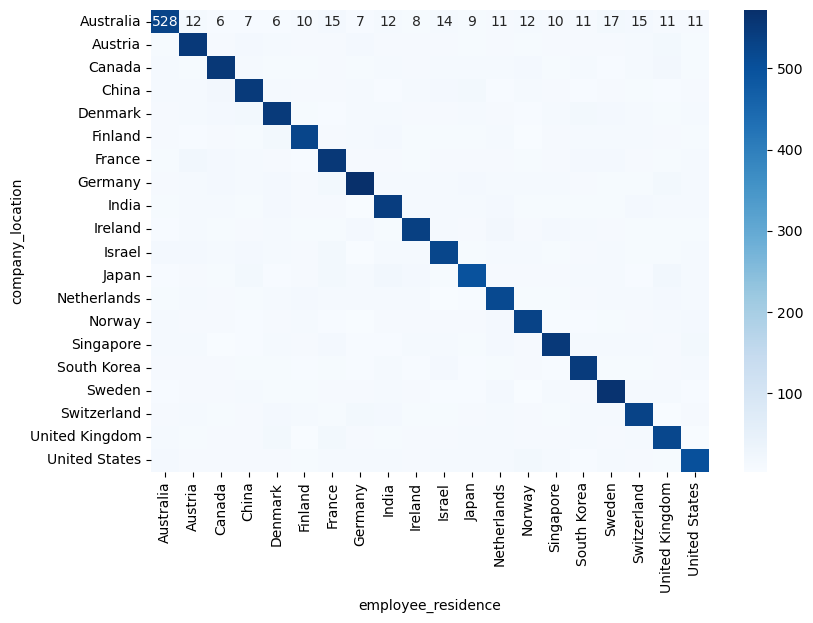

In [38]:
plt.figure(figsize=(9, 6))

cross_tab = pd.crosstab(df['company_location'], df['employee_residence'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')

plt.show()

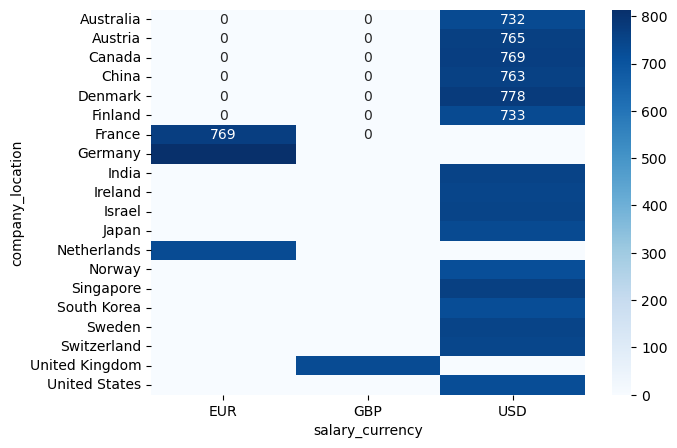

In [39]:
plt.figure(figsize=(7, 5))
cross_tab = pd.crosstab(df['company_location'], df['salary_currency'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.show()

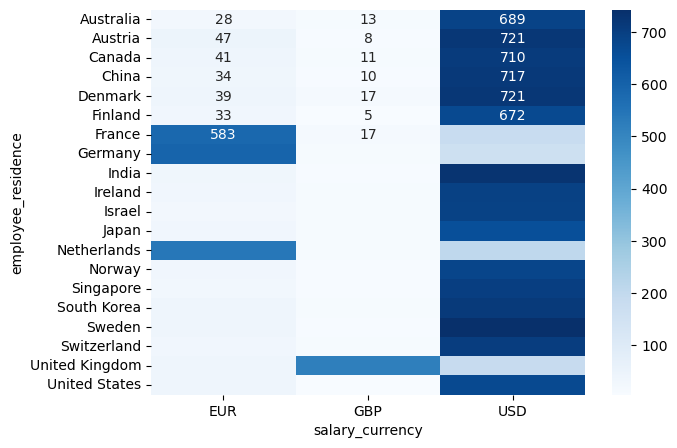

In [40]:
plt.figure(figsize=(7, 5))
cross_tab = pd.crosstab(df['employee_residence'], df['salary_currency'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.show()